# Atividade da Disciplina de Machine Learning Foundations

## Realizado por:
- Carlos Menezes de Oliveira
- Eduardo Gaspar de Sousa
- Leonardo de Souza Silva
- Murilo Santone de Menezes
- Renato Gonçalves da Costa

In [1]:
!pip install xgboost

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes, make_blobs, make_moons, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Clusterização

## Aplicando K-means a exemplo didático

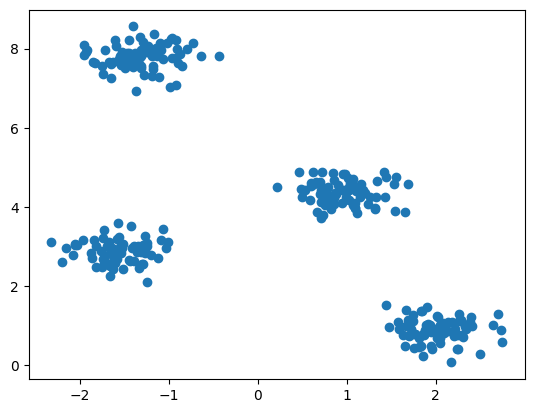

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.3, random_state=0)

plt.scatter(X[:,0], X[:,1])

plt.show()

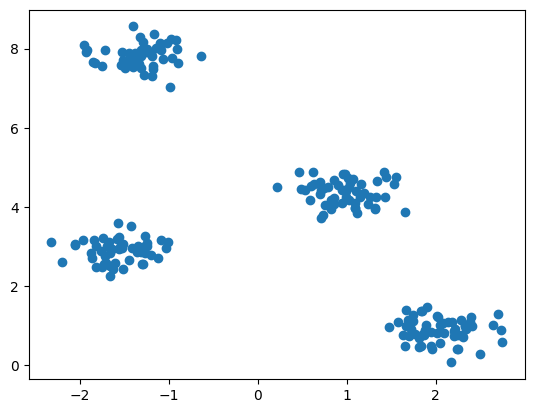

In [4]:
X_train, X_test = train_test_split(X, test_size=0.3)

plt.scatter(X_train[:,0], X_train[:,1])

plt.show()

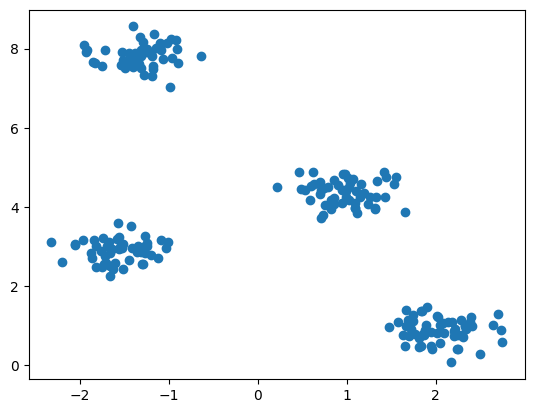

In [5]:
plt.scatter(X_train[:,0], X_train[:,1])

plt.show()

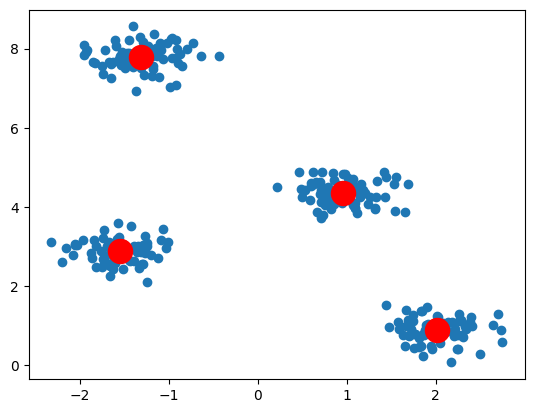

In [6]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1**-4, random_state=0)

kmeans.fit(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

### Atividades

1. Mostre o que acontece com o resultado da clusterização quando se muda o ruído na geração do dataset para 0.3 e para 0.6?
2. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque
3. Agora trein mude o rúido como 0.7, ache os clusters para o conjunto inteiro. Com isso feito separe os dados em treino e teste e achei o clusters novamente, o que mudou? Como os clusters se comportam com o conjunto de teste?

### Respostas

1. Quando o valor é aumentado de 0.3 para 0.6 ocorre de os pontos de cada cluster se espalharem mais em torno de seus respectivos centroides.
2. Observando os resultados e o desempenho: podemos concluir que o K-means é uma alternativa válida para o dataset.
3. Usando o conjunto de teste ao visualizar os dados percebemos que ficaram muito espaçados usando maior poder computacional. Já gerando treino e possível ver que o resultado ficou mais agrupado

## O que acontece quando os dados estão intercalados?

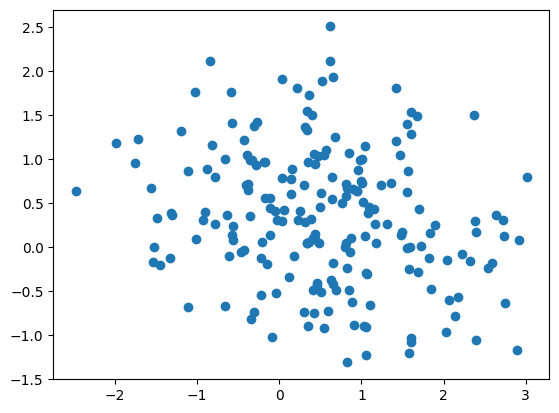

In [7]:
X, y = make_moons(n_samples=200, noise=0.6, random_state=42)

plt.scatter(X[:,0], X[:,1])

plt.show()

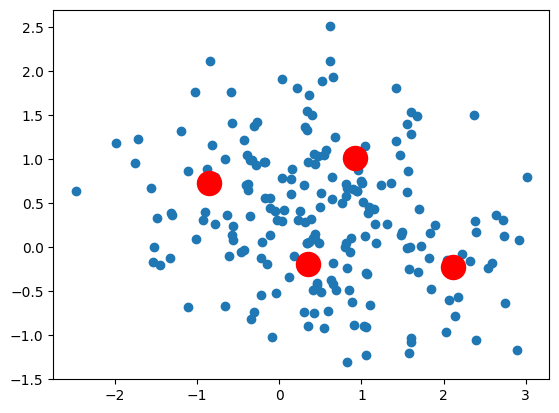

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1**-4, random_state=0)

pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

### Atividades
1. Mostre o que acontece com o resultado da clusterização quando se muda o ruído na geração do dataset para 0.3 e para 0.6?
1. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque

### Respostas
1. Os pontos ficam mais dispersos, alcançam valores maiores e seus conjuntos perdem aquele padrão de quando não havia ruído.
1. O K-means não é eficaz em encontrar clusters com fronteiras não lineares. O K-means não consegue lidar bem com essa não-linearidade, porque ele tenta dividir o espaço de maneira linear, o que não resulta em algo bom nesse dataset especificamente.

## Como clusterizar quando elementos estão centrados?

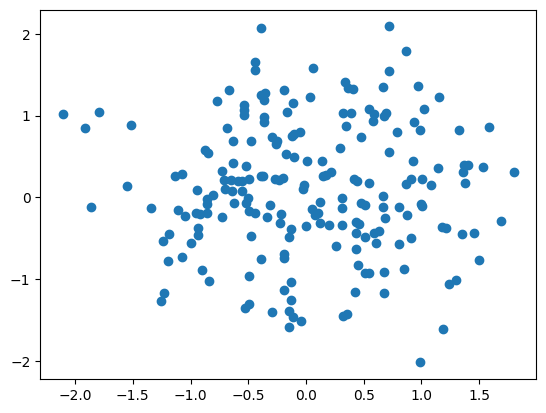

In [9]:
X, y = make_circles(n_samples=200, noise=0.6, factor=0.3, random_state=42)

plt.scatter(X[:,0], X[:,1])

plt.show()

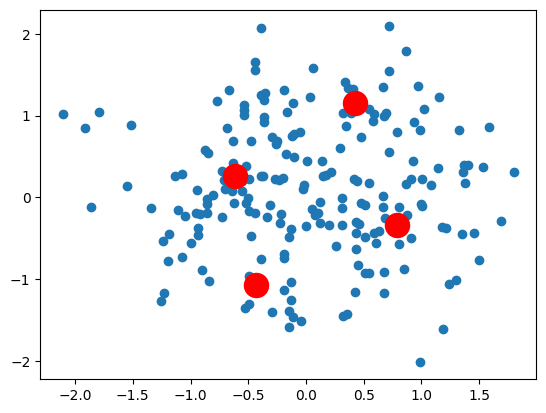

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=1**-4, random_state=0)

pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

plt.show()

### Atividades

1. Mostre o que acontece com o resultado da clusterização quando se muda o ruído na geração do dataset para 0.3 e para 0.6?
1. O que muda quando a variável factor é 0.1 e quando é 1?
1. Dada a performance do K-means, discora se é uma alternativa válida para esse dataset e porque

### Respostas

1. Quando o valor é aumentado de 0.3 para 0.6 ocorre de os pontos de cada cluster se espalharem mais em torno de seus respectivos centroides.
1. Quando factor tem um valor igual a 1 o gráfico não é gerado e é retornado um erro. o valor de factor deve ser maior que Zero e MENOR que Um.
1. Não consigo ver como o K-Means pode ajudar nesse dataset, pois não há um padrão muito bem definido para os clusters e eles acabam ficando bem dispersos.

## Aplicando análise de dados de vinho

[Link para dataset](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?select=wine-clustering.csv)

### Atividades

1. Mostre como aplicar K-means utilizando como variáveis de entrada "Alcohol" e "Color_Intensity". Qual a análise que você consegue fazer da relação das duas variáveis e dos grupos que elas geram?
1. Faça a mesma coisa para Malic_Acid e Total_Phenols
1. Com base na análise do conjunto de dados, é possível identificar de que vinícula vem o vinho? Por que?

### Respostas
1. É notável que grande parte dos vinhos estão possui intensidade de cor entre 2 e 8, já o nível de álcool varia bastante entre os 11.5 e os 14.5.
1. A maioria dos vinhos possuem um nível de 1 a 2 em Malic_Acid. já o Total Phenols varia bastante, a imagem do gráfico representa bem a concentração dita anteriormente.
1. Com base nas 4 variáveis analisadas: não. As 4 variáveis não fornecem informações o suficiente para responder essa pergunta.

In [13]:
# Carregar o arquivo CSV
df = pd.read_csv('wine-clustering.csv')

# Selecionar variáveis de interesse
df_subset = df[['Alcohol', 'Color_Intensity']]

# Normalizar os dados
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_subset)

In [14]:
# Aplicar o K-means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_normalized)

# Adicionar o resultado ao DataFrame
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


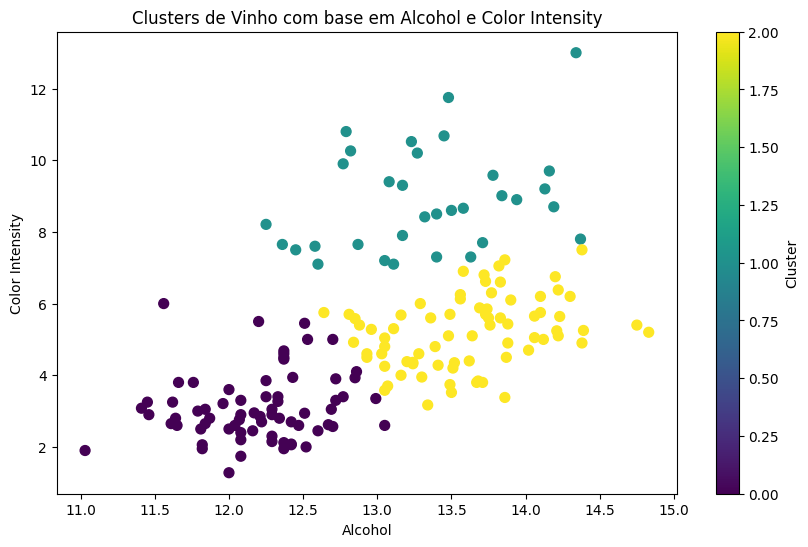

In [15]:
# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol'], df['Color_Intensity'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Clusters de Vinho com base em Alcohol e Color Intensity')
plt.colorbar(label='Cluster')
plt.show()

### Resposta

É notável que grande parte dos vinhos estão possui intensidade de cor entre 2 e 8, já o nível de álcool varia bastante entre os 11.5 e os 14.5. Ou seja: A intensidade de cor não varia bastante, já o nível de álcool sim.

In [16]:
# Selecionar variáveis de interesse
df_subset = df[['Malic_Acid', 'Total_Phenols']]

# Normalizar os dados
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_subset)

In [17]:
# Aplicar o K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_normalized)

# Adicionar o resultado ao DataFrame
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


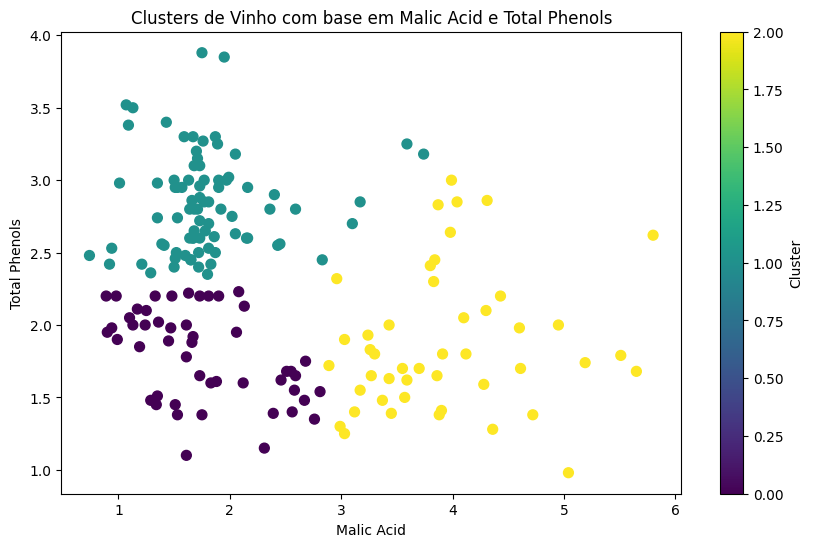

In [18]:
# Plotar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Malic_Acid'], df['Total_Phenols'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Malic Acid')
plt.ylabel('Total Phenols')
plt.title('Clusters de Vinho com base em Malic Acid e Total Phenols')
plt.colorbar(label='Cluster')
plt.show()

### Resposta

A maioria dos vinhos possuem um nível de 1 a 2 em Malic_Acid. já o Total Phenols varia bastante, a imagem do gráfico representa bem a concentração dita anteriormente.

# Regressão

## Predizendo evolução de diabetes

[Link para dataset utilizado](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)

### Aplicação de árvores de decisão

In [19]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3)

regressor = DecisionTreeRegressor()

regressor.fit(X_diabetes_train, y_diabetes_train)

DecisionTreeRegressor()

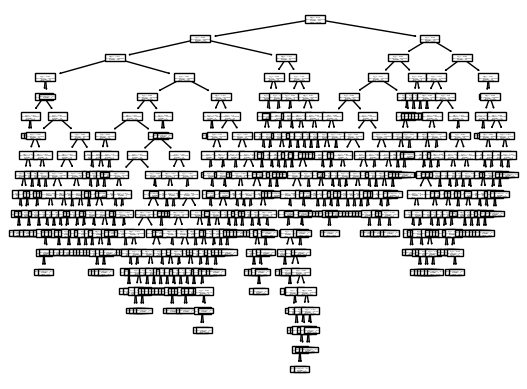

In [20]:
_ = plot_tree(regressor)

### Aplicação de regressão linear

In [21]:
regressor_linear = LinearRegression()

regressor_linear.fit(X_diabetes_train, y_diabetes_train)

LinearRegression()

### Comparando as soluções

In [22]:
y_pred_arvore_regressao = regressor.predict(X_diabetes_train)
y_pred_regressao_linear = regressor_linear.predict(X_diabetes_train)

RMSE_arvore_regressao = mean_squared_error(y_diabetes_train, y_pred_arvore_regressao, squared=False)
RMSE_regressao_linear = mean_squared_error(y_diabetes_train, y_pred_regressao_linear, squared=False)

print(f"RMSE da arvore de regressao eh {RMSE_arvore_regressao:.2f}, enquanto da regressao linear {RMSE_regressao_linear:.2f}")

RMSE da arvore de regressao eh 0.00, enquanto da regressao linear 55.27


In [23]:
y_pred_arvore_regressao = regressor.predict(X_diabetes_test)
y_pred_regressao_linear = regressor_linear.predict(X_diabetes_test)

RMSE_arvore_regressao = mean_squared_error(y_diabetes_test, y_pred_arvore_regressao, squared=False)
RMSE_regressao_linear = mean_squared_error(y_diabetes_test, y_pred_regressao_linear, squared=False)

print(f"RMSE da arvore de regressao eh {RMSE_arvore_regressao:.2f}, enquanto da regressao linear {RMSE_regressao_linear:.2f}")

RMSE da arvore de regressao eh 78.83, enquanto da regressao linear 50.07


#### Atividades

1. Que outras métricas de avaliação poderiam ser usadas?
1. Teria como configurar a regressão linear?
1. Teria como configurar a regressão de árvore?
1. Por que ao plotar a árvore ela fica tão extensa?
1. Qual melhor dos dois modelos e por que?

#### Respostas
1. O RMSE é uma boa métrica, mas outras como MAE, MSE, R² e MAPE também são amplamente utilizadas para avaliar modelos de regressão. Todas essas opções podem oferecer diferentes perspectivas sobre o desempenho de um modelo.
1. Sim, existem algumas formas de melhorar o desempenho da regressão linear, como adicionar features, normalização e regularização.
1. Sim, é possível configurar a árvore de regressão para melhorar sua performance usando funções como: max_depth, min_samples_leaf, criterion etc..
1. Árvores de decisão ficam longas quando o modelo tenta ajustar cada pequena variação nos dados, especialmente se não houver limites impostos (como max_depth ou min_samples_leaf).
1. A questão do melhor modelo é subjetiva e depende do contexto. O fato de a árvore ter um RMSE de 0.00 sugere overfitting, já que um ajuste perfeito em dados de treino geralmente significa que o modelo não generaliza bem. A regressão linear pode ser preferível em cenários mais simples, mas se houver não linearidades, uma árvore pode ser mais eficaz se configurada corretamente.

## Predição de preço de casas

## Atividade

Com base no [dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset) façam

1. A predição do preço das casas
1. Compare modelos como [XGBoost](https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html) e árvode de decisão com regressão linear
1. Façam comparações de métricas diferentes para medir a qualidade das predições e expliquem porque as diferenças
1. Se vocês fossem utilizar um dos medelos que desenvolveram em produção, qual usuariam e por que?

In [24]:
df = pd.read_csv("Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)

# Variaveis de entrada
# features
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'airconditioning', 'parking']]
# variável target
y = df['price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f} - MAE: {mae:.2f} - R2: {r2:.2f}")

MSE: 1738852080615.61 - MAE: 974408.74 - R2: 0.60


#2. Comparação entre modelos: XGBoost, Árvore de Decisão e Regressão Linear

In [31]:
# Treino e avaliação modelo XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [32]:
# Treino e avaliação modelo de Árvore de Decisão
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [33]:
# Avaliação dos modelos
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Árvore de Decisão - MSE: {mse_tree:.2f} - MAE: {mae_tree:.2f} - R²: {r2_tree:.2f}')
print(f'XGBoost - MSE: {mse_xgb:.2f} - MAE: {mae_xgb:.2f} - R²: {r2_xgb:.2f}')

Árvore de Decisão - MSE: 3665164805321.75 - MAE: 1327451.97 - R²: 0.15
XGBoost - MSE: 2064936795216.38 - MAE: 1066788.67 - R²: 0.52


#3. Comparações de métricas e explicação das diferenças

MSE (Mean Squared Error): Penaliza erros de predição, útil para evitar desvios.

MAE (Mean Absolute Error): Indica erro médio absoluto das predições é menos sensível a grandes erros.

R² (Coeficiente de Determinação): Mede a proporção da variação explicada pelo modelo.

XGBoost: geralmente costuma ter um desempenho melhor, é mais preciso por combinar várias árvores para melhorar as predições.

Árvore de Decisão: Superajusta os dados de treino, se tivermos poucos dados pode levar a menor generalização

Regressão Linear: Mais simples e rápida, porém dificil de capturar padrões não lineares nos dados.

#4. Modelo para usar em produção e justificativa

Erro médio Quadrático (MSE): O XGBoost tem um valor de MSE menor que o da Árvore de Decisão, indica que em média, o erro das predições é menor.

Erro Absoluto Médio (MAE): O XGBoost tem um valor menor, isso indica que o erro médio absoluto das suas predições é menor do que o da Árvore de Decisão, quando um MAE é menor é melhor pois indica que o modelo está errando menos em média.

Coeficiente de Determinação (R²): O XGBoost teve um valor equivalente maior que o da Árvore de decisão. Um R² maior significa que ele consegue explicar mais as variações nos preços do que um R² menor.